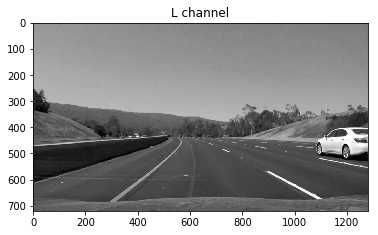

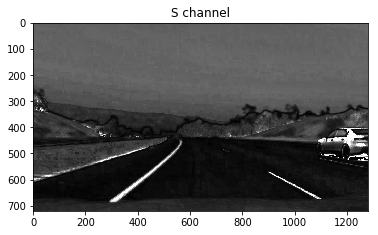

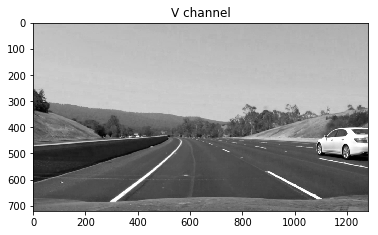

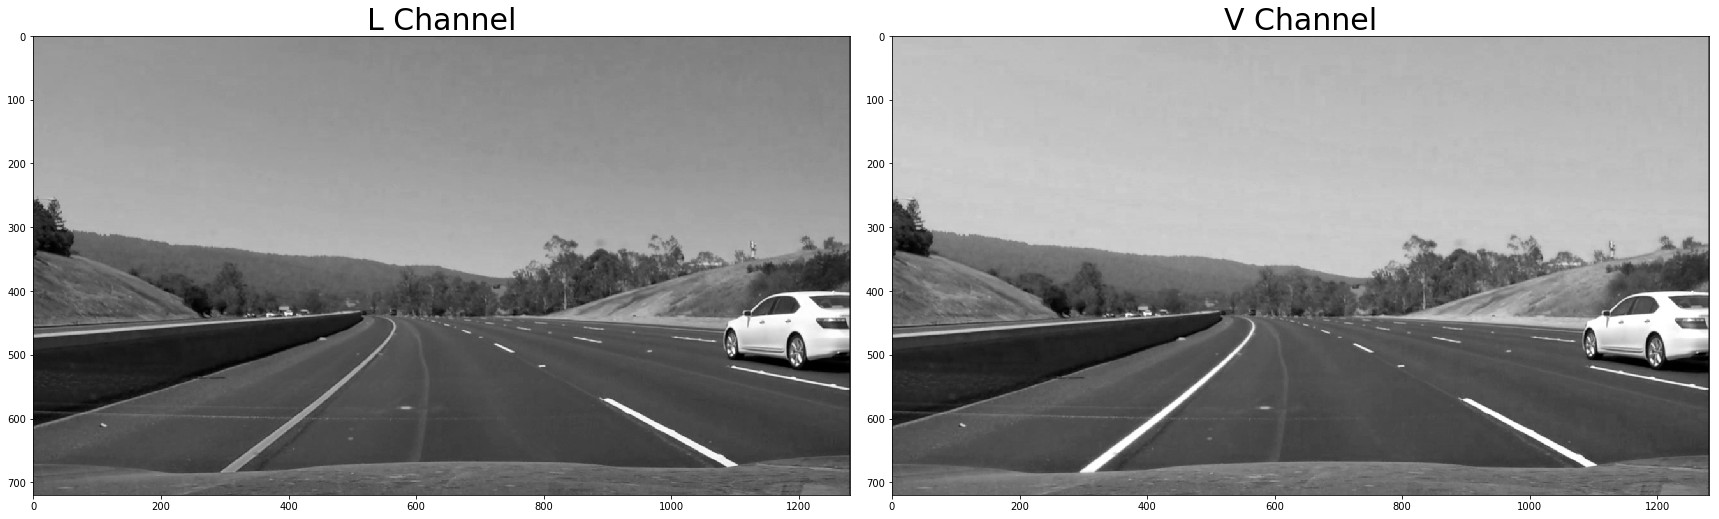

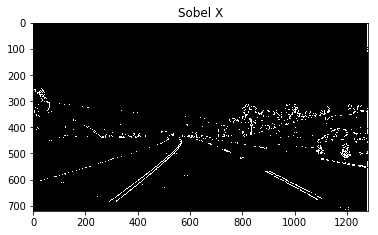

0.698031452549


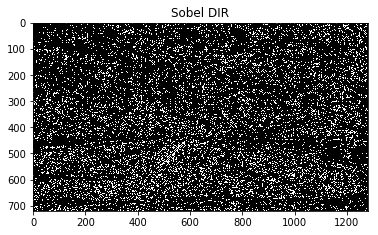

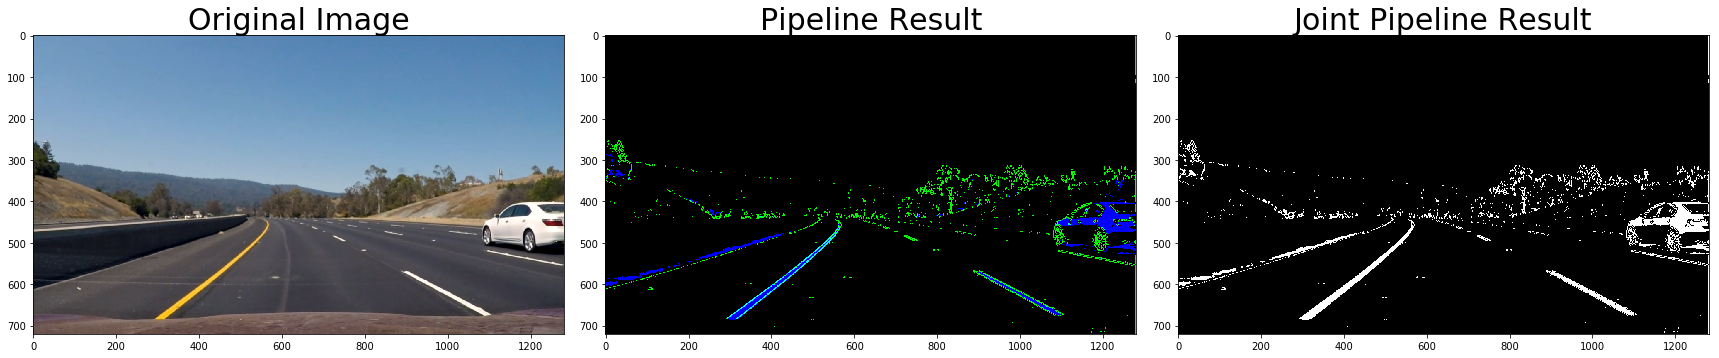

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# image = mpimg.imread('bridge_shadow.jpg')
image = mpimg.imread('test_images/2test.jpg')

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(120, 255), sx_thresh=(25, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the channels
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
#     plt.imshow( h_channel , cmap='gray')
#     plt.title("H channel")
#     plt.show()

    plt.imshow( l_channel , cmap='gray')
    plt.title("L channel")
    plt.show()

    plt.imshow( s_channel , cmap='gray')
    plt.title("S channel")
    plt.show()

    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    v_channel = hsv[:,:,2]

    plt.imshow( v_channel , cmap='gray')
    plt.title("V channel")
    plt.show()

#     plt.imshow( hsv[:,:,0] , cmap='gray')
#     plt.show()

#     plt.imshow( hsv[:,:,1] , cmap='gray')
#     plt.show()

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow( l_channel , cmap='gray')
    ax1.set_title('L Channel', fontsize=30)

    ax2.imshow( v_channel , cmap='gray')
    ax2.set_title('V Channel', fontsize=30)
    plt.show()


    # Sobel x -- l_channel
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x -- originally from l channel
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
        
    plt.imshow(sxbinary,cmap='gray')
    plt.title("Sobel X")
    plt.show()
    
#     # Sobel x  -- v_channel
#     sobelx = cv2.Sobel(v_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
#     abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
#     scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
#     # Threshold x gradient
#     sxbinary = np.zeros_like(scaled_sobel)
#     sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
        
#     plt.imshow(sxbinary,cmap='gray')  
#     plt.show()


    # sobel dir and mag gradient
    sobely = cv2.Sobel(l_channel, cv2.CV_64F, 0, 1)
    abs_sobely = np.absolute(sobely)
    scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))

    dir = np.arctan2(abs_sobely,abs_sobelx)

    print( np.mean(dir[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])]) )
    
    mag = np.sqrt(sobelx**2 + sobely**2)
    scaled_mag = np.uint8(255*mag/np.max(mag))

    sybinary = np.zeros_like(scaled_sobel)
    sybinary[(scaled_sobely >= sx_thresh[0]) & (scaled_sobely <= sx_thresh[1])]=1

    mag_binary = np.zeros_like(scaled_sobel)
    mag_binary[(scaled_mag >= sx_thresh[0]) & (scaled_mag <= sx_thresh[1])]=1
    
    dir_binary = np.zeros_like(scaled_sobel)
    dir_binary[(dir >= 0.698031452549*0.8) & (dir <= 0.698031452549*1.2)] = 1


#     plt.imshow(sybinary,cmap='gray')  
#     plt.title("Sobel Y")
#     plt.show()
    
    
#     plt.imshow(mag_binary,cmap='gray')  
#     plt.title("Sobel Mag")
#     plt.show()
    
    plt.imshow(dir_binary,cmap='gray')  
    plt.title("Sobel DIR")
    plt.show()
    
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel) # original is s_channel
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
        
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    
    # Compute the binary output as well
    gs_binary = np.zeros_like(color_binary)
    gs_binary[ (sxbinary == 1) | (s_binary == 1) ] = 255

    return color_binary , gs_binary
    
result, gray_result = pipeline(image)

# Plot the result
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=30)

ax3.imshow( gray_result , cmap='gray')
ax3.set_title('Joint Pipeline Result', fontsize=30)
plt.show()

## s channel (from HLS) is good for color thresholding
## both L (from HLS) and V (from HSV) seem good to compute the sobel operator / gradient and thresholded
# so in the end I'll use L so that I only need one transform